<a href="https://colab.research.google.com/github/djajsla999/2020-2-AI/blob/master/Code/04_mnist_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

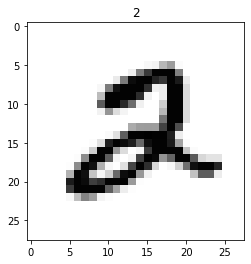

In [ ]:
import matplotlib.pyplot as plt

n = 5
ttl = str(y_train[n])
plt.figure(figsize=(6, 4))
plt.title(ttl)
plt.imshow(x_train[n], cmap='Greys')

In [ ]:
y_train[0]

5

In [ ]:
import sys

for x in x_train[0]:
    for i in x:
      sys.stdout.write('%3d' % i)
  sys.sydout.write('\n')


IndentationError: ignored

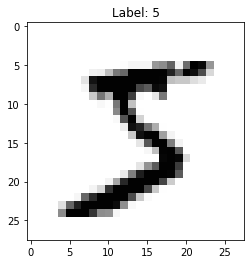

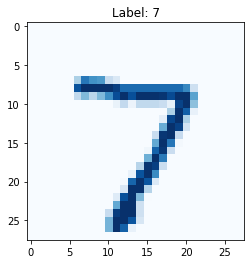

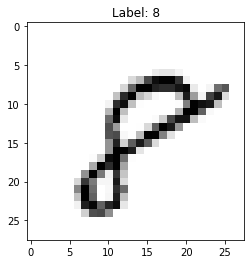

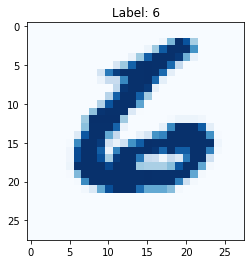

In [ ]:
import matplotlib.pyplot as plt

tmp = "Label: " + str(y_train[0])
plt.title(tmp)
plt.imshow(x_train[0], cmap="Greys")
plt.show()

tmp = "Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap="Blues")
plt.show()

idx = len(x_train) -1
tmp = "Label: " + str(y_train[idx])
plt.title(tmp)
plt.imshow(x_train[idx], cmap="Greys")
plt.show()

idx = len(x_test) -1
tmp = "Label: " + str(y_test[idx])
plt.title(tmp)
plt.imshow(x_test[idx], cmap="Blues")
plt.show()

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from random import sample
nrows, ncols = 4, 5 #출력 가로 세로 수

idx = sorted(sample(range(len(x_train)), nrows * ncols))
print(idx)

[848, 8840, 13041, 16592, 18720, 21823, 26417, 28648, 28853, 36076, 39160, 39812, 39877, 39924, 44137, 44164, 48172, 48901, 56830, 59761]


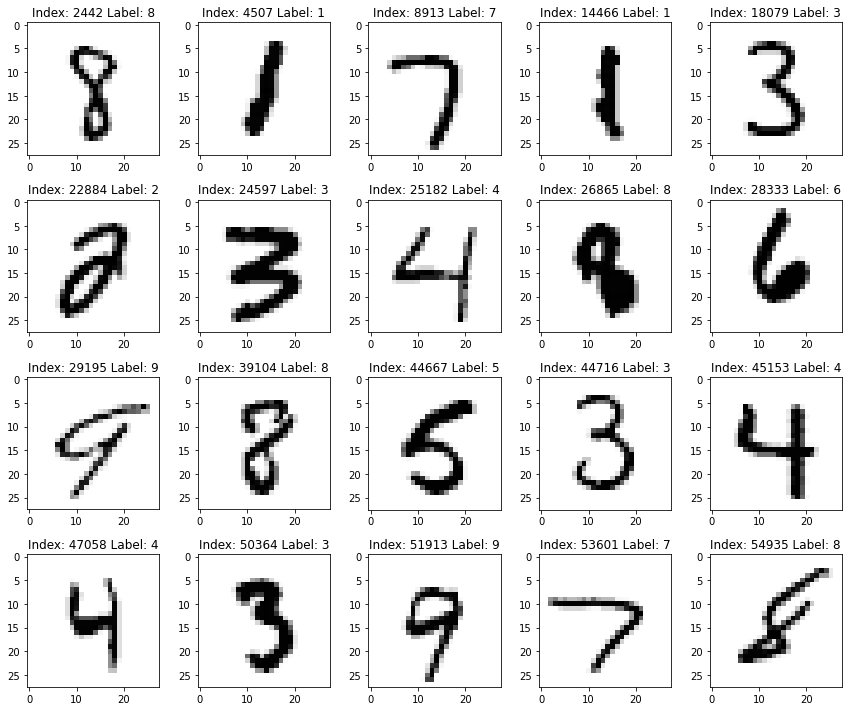

In [ ]:
from random import sample

nrows, ncols = 4, 5

idx = sorted(sample(range(len(x_train)), nrows * ncols))

count = 0
plt.figure(figsize=(12, 10))

for n in idx:
  count += 1
  plt.subplot(nrows, ncols, count)
  tmp = "Index: " + str(n) + " Label: " + str(y_train[n])
  plt.title(tmp)
  plt.imshow(x_train[n], cmap="Greys")

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#샘플 값을 정수 (0~255)에서 부동소수 (0~1)로 변환
x_train, xtest = x_train / 255.0, x_test / 255.0

# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')
                                    
])

#훈련에 사용할 옵티마이저와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#모텔 요약 표시
model.summary()

#모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

#모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2990 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1460 - accuracy: 0.9565
Epoch 3/5
1875/1875 [===========================

[13.088618278503418, 0.9747999906539917]